In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import kendalltau, pearsonr

In [17]:
country = "France"
year = 2022
geography = "department_id"
method = "std"

In [18]:
df_transition = pd.read_csv(f"data_transition/{country}_{year}_{geography}_expanded.csv", encoding="latin-1")
df_transition.head()

,Unnamed: 0,Nathalie.ARTHAUD.Emmanuel.MACRON,Fabien.ROUSSEL.Emmanuel.MACRON,Emmanuel.MACRON.Emmanuel.MACRON,Jean.LASSALLE.Emmanuel.MACRON,Marine.LE.PEN.Emmanuel.MACRON,Éric.ZEMMOUR.Emmanuel.MACRON,Jean.Luc.MÉLENCHON.Emmanuel.MACRON,Anne.HIDALGO.Emmanuel.MACRON,Yannick.JADOT.Emmanuel.MACRON,...,Jean.LASSALLE.Marine.LE.PEN,Marine.LE.PEN.Marine.LE.PEN,Éric.ZEMMOUR.Marine.LE.PEN,Jean.Luc.MÉLENCHON.Marine.LE.PEN,Anne.HIDALGO.Marine.LE.PEN,Yannick.JADOT.Marine.LE.PEN,Valérie.PÉCRESSE.Marine.LE.PEN,Philippe.POUTOU.Marine.LE.PEN,Nicolas.DUPONT.AIGNAN.Marine.LE.PEN,department_id
0,1,0,0.462799,0.920431,0.399662,0,0.241726,0.812079,0.543031,0.987694,...,0.576302,0.992662,0.757577,0.186265,0.432378,0,0,0.744773,0.988994,01
1,2,0,0.247988,0.883910,0.292247,0,0.095996,0.733322,0.462405,0.982231,...,0.707753,1.000000,0.902094,0.266678,0.529446,0,0,0.826343,1.000000,02
2,3,0,0.447471,0.911682,0.341199,0,0.204412,0.807793,0.486873,0.987746,...,0.653403,1.000000,0.793359,0.190671,0.498413,0,0,0.781296,0.990476,03
3,4,0,0.354856,0.914200,0.291323,0,0.146793,0.732674,0.476241,0.983525,...,0.708677,1.000000,0.850481,0.267326,0.511709,0,0,0.802960,0.998603,04
4,5,0,0.330715,0.930982,0.306758,0,0.162164,0.772897,0.473273,0.985683,...,0.693242,0.993290,0.835054,0.227094,0.515397,0,0,0.800649,0.996697,05


In [19]:
df_dv = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{geography}_{method}.csv.gz", compression="gzip")
df_dv = df_dv.dropna()
df_dv.head()

,department_id,candidate,value
0,01,Emmanuel MACRON,0.055845
1,01,Fabien ROUSSEL,0.010131
2,01,Jean LASSALLE,0.018093
3,01,Jean-Luc MÉLENCHON,0.064312
4,01,Marine LE PEN,0.069733


In [20]:
df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")
df_location.head()

C:\Users\cnava\AppData\Local\Temp\ipykernel_22948\3353935792.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_location = pd.read_csv(f"data_output/{country}/{year}_first_round_location.csv.gz", compression="gzip")


,department_id,department,circunscription_id,circunscription,commune_id,commune,polling_place,electors,abstentions,polling_id
0,01,Ain,4,4ème circonscription,01001,L'Abergement-Clémenciat,0001,645,108,01-1-0001
1,01,Ain,5,5ème circonscription,01002,L'Abergement-de-Varey,0001,213,38,01-2-0001
2,01,Ain,5,5ème circonscription,01004,Ambérieu-en-Bugey,0001,1129,266,01-4-0001
3,01,Ain,5,5ème circonscription,01004,Ambérieu-en-Bugey,0002,1128,265,01-4-0002
4,01,Ain,5,5ème circonscription,01004,Ambérieu-en-Bugey,0003,1213,246,01-4-0003


In [21]:
df_fround = pd.read_csv(f"data_output/{country}/{year}_first_round.csv.gz", compression="gzip")
df_fround = pd.merge(df_fround, df_location[["polling_id", geography]], on="polling_id")
df_fround = df_fround.groupby([geography, "candidate"]).agg({"value": "sum"})
df_fround["rate"] = df_fround.groupby(level=[0]).apply(lambda x: x/x.sum())
df_fround = df_fround.reset_index()
df_fround.head()

,department_id,candidate,value,rate
0,01,Anne HIDALGO,5644,0.016948
1,01,Emmanuel MACRON,92206,0.276875
2,01,Fabien ROUSSEL,5938,0.017831
3,01,Jean LASSALLE,10876,0.032658
4,01,Jean-Luc MÉLENCHON,57832,0.173657


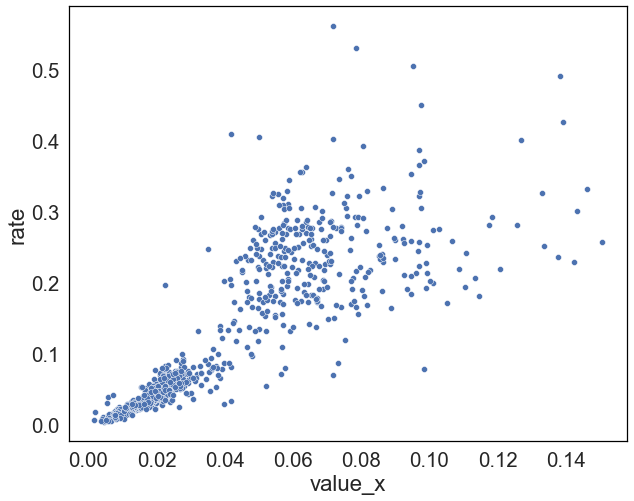

In [22]:
dd = pd.merge(df_dv, df_fround, on=[geography, "candidate"])


g = sns.scatterplot(x="value_x", y="rate", data=dd)
# g.set_xscale("log")

In [23]:
df = pd.merge(df_dv, df_transition, on=geography)
df.head()

,department_id,candidate,value,Unnamed: 0,Nathalie.ARTHAUD.Emmanuel.MACRON,Fabien.ROUSSEL.Emmanuel.MACRON,Emmanuel.MACRON.Emmanuel.MACRON,Jean.LASSALLE.Emmanuel.MACRON,Marine.LE.PEN.Emmanuel.MACRON,Éric.ZEMMOUR.Emmanuel.MACRON,...,Emmanuel.MACRON.Marine.LE.PEN,Jean.LASSALLE.Marine.LE.PEN,Marine.LE.PEN.Marine.LE.PEN,Éric.ZEMMOUR.Marine.LE.PEN,Jean.Luc.MÉLENCHON.Marine.LE.PEN,Anne.HIDALGO.Marine.LE.PEN,Yannick.JADOT.Marine.LE.PEN,Valérie.PÉCRESSE.Marine.LE.PEN,Philippe.POUTOU.Marine.LE.PEN,Nicolas.DUPONT.AIGNAN.Marine.LE.PEN
0,01,Emmanuel MACRON,0.055845,1,0,0.462799,0.920431,0.399662,0,0.241726,...,0.078694,0.576302,0.992662,0.757577,0.186265,0.432378,0,0,0.744773,0.988994
1,01,Fabien ROUSSEL,0.010131,1,0,0.462799,0.920431,0.399662,0,0.241726,...,0.078694,0.576302,0.992662,0.757577,0.186265,0.432378,0,0,0.744773,0.988994
2,01,Jean LASSALLE,0.018093,1,0,0.462799,0.920431,0.399662,0,0.241726,...,0.078694,0.576302,0.992662,0.757577,0.186265,0.432378,0,0,0.744773,0.988994
3,01,Jean-Luc MÉLENCHON,0.064312,1,0,0.462799,0.920431,0.399662,0,0.241726,...,0.078694,0.576302,0.992662,0.757577,0.186265,0.432378,0,0,0.744773,0.988994
4,01,Marine LE PEN,0.069733,1,0,0.462799,0.920431,0.399662,0,0.241726,...,0.078694,0.576302,0.992662,0.757577,0.186265,0.432378,0,0,0.744773,0.988994


In [27]:
candidates = ["Jean-Luc MÉLENCHON", "Emmanuel MACRON", "Marine LE PEN"]
# candidates = ["FRANCO PARISI FERNANDEZ", "JOSE ANTONIO KAST RIST", "GABRIEL BORIC FONT"]
candidate_a = candidates[0].replace(" ", ".").replace("-", ".") + "." + candidates[1].replace(" ", ".")
candidate_b = candidates[0].replace(" ", ".").replace("-", ".") + "." + candidates[2].replace(" ", ".")

In [28]:
candidate_a

'Jean.Luc.MÉLENCHON.Emmanuel.MACRON'

In [33]:
data = df[["candidate", geography, "value", candidate_a]]
data = data[~data["department_id"].isin(["ZZ", "ZD", "ZA", "ZB", "ZC", "ZX", "ZS", "ZP", "ZN", "ZW", "ZM"])]

data = data[data["candidate"].isin(candidates)]

data = pd.merge(data, df_fround.rename(columns={"value": "votes"}), on=[geography, "candidate"])
data.head()

,candidate,department_id,value,Jean.Luc.MÉLENCHON.Emmanuel.MACRON,votes,rate
0,Emmanuel MACRON,01,0.055845,0.812079,92206,0.276875
1,Jean-Luc MÉLENCHON,01,0.064312,0.812079,57832,0.173657
2,Marine LE PEN,01,0.069733,0.812079,86755,0.260507
3,Emmanuel MACRON,02,0.051967,0.733322,58721,0.220872
4,Jean-Luc MÉLENCHON,02,0.054779,0.733322,41172,0.154863


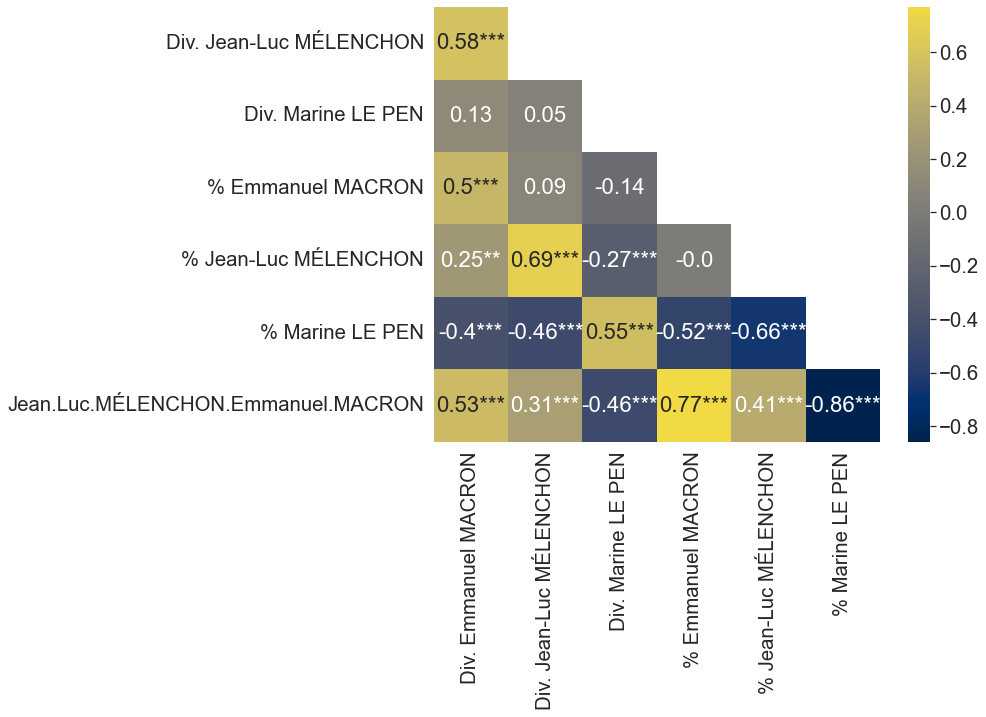

In [34]:
tbl = data.pivot(
    index=geography, 
    columns=["candidate"],
    values=["value", "rate"]
).reset_index()

def labels(x):
    if x[1] == "":
        return x[0]
    else:
        l = {"rate": "% ", "value": "Div. "}
    label = f"{l[x[0]]}{x[1]}"
    return label
tbl.columns = [labels(x) for x in list(tbl)]
tbl = pd.merge(tbl, df_transition[[geography, candidate_a]], on=geography)
m = tbl.corr()

sns.set_style("whitegrid")
sns.set(font_scale=1.85, rc={"figure.figsize": (10, 8)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rcParams['axes.grid'] = False


corr_m = tbl.corr()
rho = tbl.corr()

pval = tbl.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: "".join(["*" for t in [0.01, 0.05, 0.1] if x<=t]))
p = rho.round(2).astype(str) + p

p = np.tril(p.values, k=-1)

p[p==0] = np.nan
p = pd.DataFrame(p).dropna(axis=0, how="all").dropna(axis=1, how="all")

# np.fill_diagonal(corr_m.values, np.nan)
labels_m = list(corr_m)
corr_m = np.tril(corr_m.values, k=-1)

corr_m[corr_m==0] = np.nan

heatmap_data = pd.DataFrame(corr_m, index=labels_m, columns=labels_m).round(2)\
                .dropna(axis=0, how="all")\
                .dropna(axis=1, how="all")

g = sns.heatmap(heatmap_data, annot=p, center=0, cmap="cividis", fmt="", cbar=True)

<AxesSubplot:xlabel='diff', ylabel='diff2'>

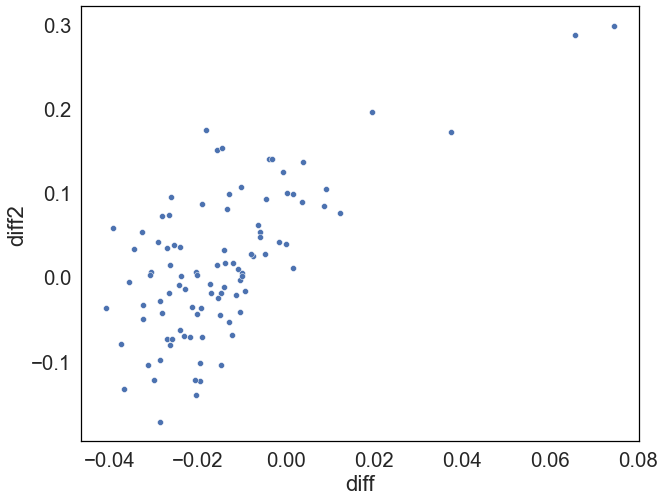

In [35]:
aa = data[data["candidate"] == candidates[1]]
bb = data[data["candidate"] == candidates[2]]

cc = pd.merge(aa, bb, on=geography)
cc["diff"] = cc["value_x"] - cc["value_y"]
cc["diff2"] = cc["rate_x"] - cc["rate_y"]

sns.scatterplot(x="diff", y="diff2", data=cc)

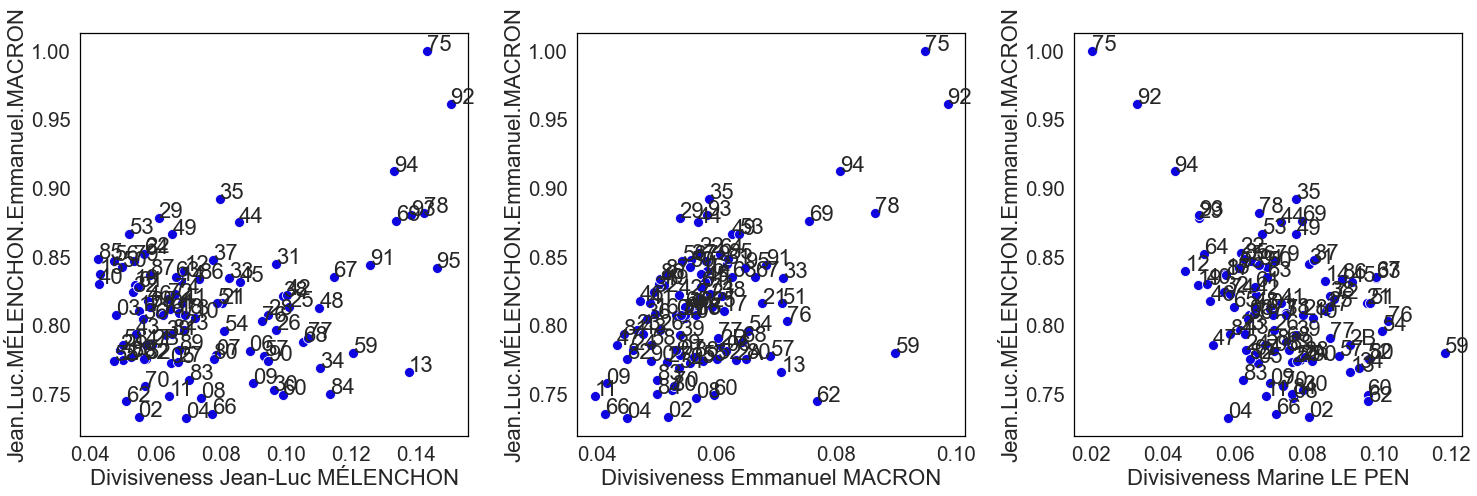

In [43]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7))

for idx, candidate in enumerate(candidates):
    g = sns.scatterplot(x="value", s=100, color="#0D04DF", y=candidate_a, data=data[data["candidate"] == candidate], ax=axs[idx])
    g.set_xlabel(f"Divisiveness {candidate}")
    
    for x, tmp in data[data["candidate"] == candidate].iterrows():
        g.text(tmp["value"], tmp[candidate_a], tmp[geography])

fig.tight_layout()